In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
train=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/HR/train.csv')
test=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/HR/test.csv')

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
test.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


In [5]:
train.shape

(54808, 14)

In [6]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
train=train.fillna(0)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,54808.0,3.078748,1.496458,0.0,2.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [10]:
import sweetviz as sv

In [11]:
dict(train.dtypes)

{'employee_id': dtype('int64'),
 'department': dtype('O'),
 'region': dtype('O'),
 'education': dtype('O'),
 'gender': dtype('O'),
 'recruitment_channel': dtype('O'),
 'no_of_trainings': dtype('int64'),
 'age': dtype('int64'),
 'previous_year_rating': dtype('float64'),
 'length_of_service': dtype('int64'),
 'KPIs_met >80%': dtype('int64'),
 'awards_won?': dtype('int64'),
 'avg_training_score': dtype('int64'),
 'is_promoted': dtype('int64')}

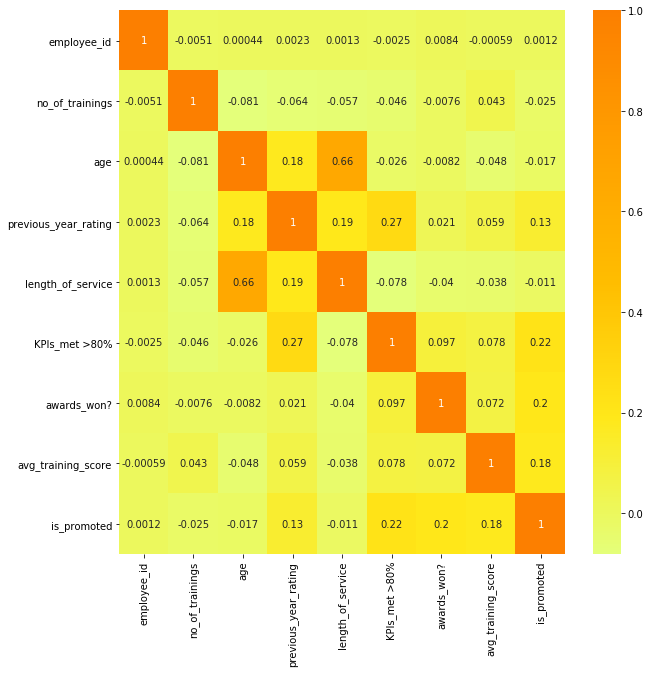

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True,cmap='Wistia')

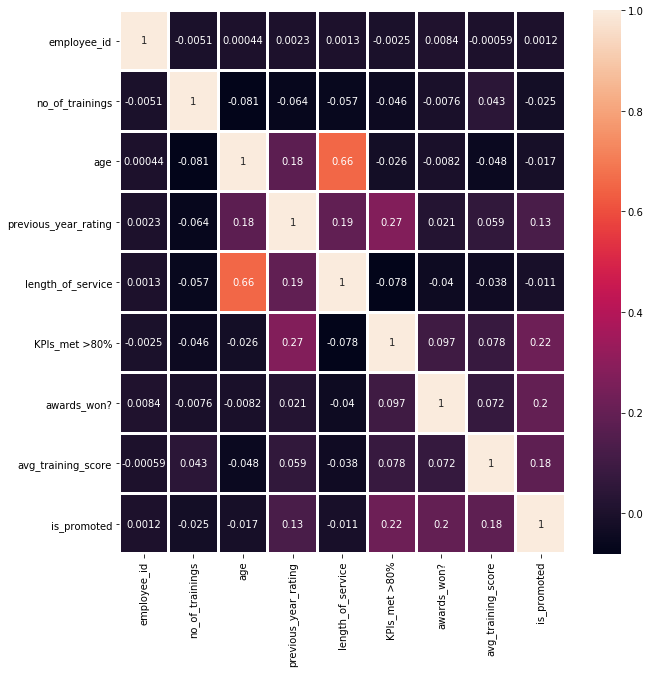

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True,linewidths=2)

Text(0.5, 1.0, 'Department')

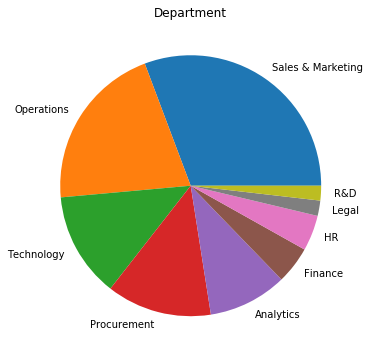

In [14]:
plt.figure(figsize=(6,6))
train.department.value_counts().plot(kind='pie',subplots=True)
plt.ylabel("")
plt.title("Department")

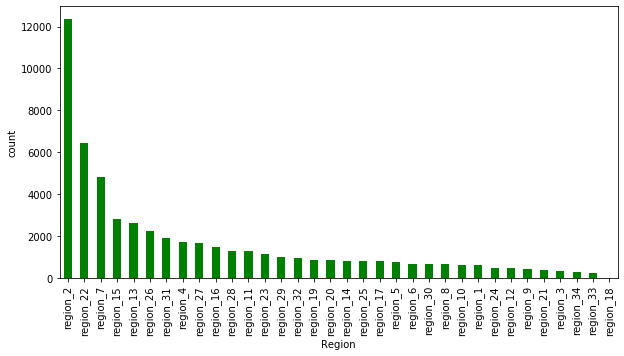

In [16]:
#Region
plt.figure(figsize=(10,5))
train.region.value_counts().plot(kind='bar',color='g')
plt.xlabel('Region')
plt.ylabel('count')
plt.show()

No handles with labels found to put in legend.


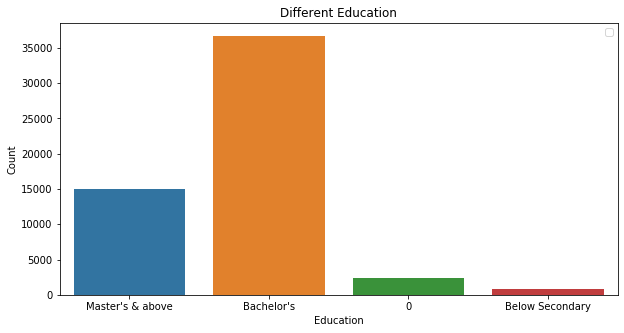

In [17]:
plt.figure(figsize=(10,5))
sns.countplot('education',data=train)
plt.xlabel("Education")
plt.ylabel("Count")
plt.title("Different Education")
plt.legend()
plt.show()

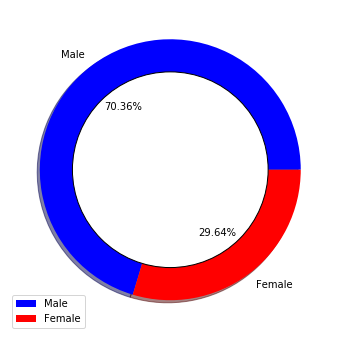

In [18]:
train.gender.value_counts()
labels = ['Male','Female']
colors = ['b','r']
sizes = [55092,23206]
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct = '%.2f%%',shadow=True)
#Now make circle at the centre to make it donut
circle = plt.Circle((0,0),0.75,facecolor='white',edgecolor='black')
fig=plt.gcf()  #gcf represent "get current figure"
fig.gca().add_artist(circle)
plt.legend()
plt.show()

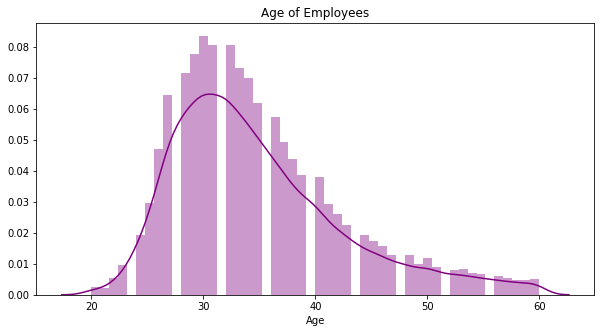

In [19]:
#Now Exploring Numerical Variables
#Age
plt.figure(figsize=(10,5))
sns.distplot(train.age,color='purple')
plt.xlabel("Age")
plt.title("Age of Employees")
plt.show()

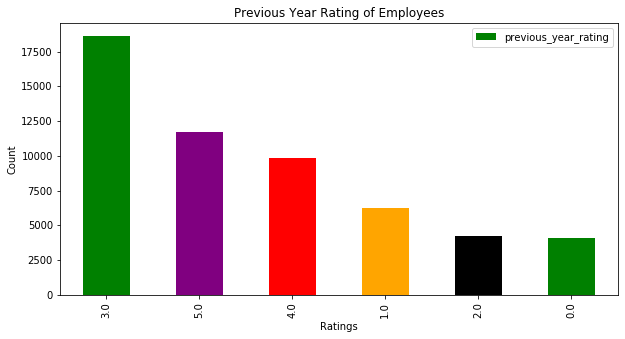

In [20]:
#Previous year rating
plt.figure(figsize=(10,5))
train.previous_year_rating.value_counts().plot(kind='bar',color=['green','purple','red','orange','black'])
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.title("Previous Year Rating of Employees")
plt.legend()
plt.show()

No handles with labels found to put in legend.


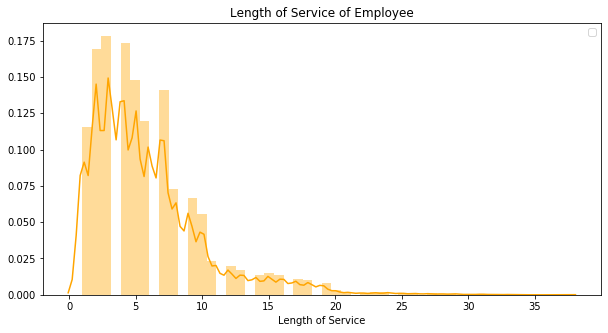

In [21]:
#Length of Service
plt.figure(figsize=(10,5))
sns.distplot(train['length_of_service'],color='orange')
plt.xlabel("Length of Service")
plt.title("Length of Service of Employee")
plt.legend()
plt.show()

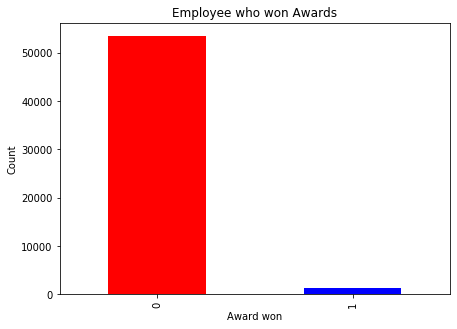

In [22]:
#Award Won
plt.figure(figsize=(7,5))
train['awards_won?'].value_counts().plot(kind='bar',color=['red','blue'])
plt.xlabel('Award won')
plt.ylabel('Count')
plt.title("Employee who won Awards")
plt.show()

No handles with labels found to put in legend.


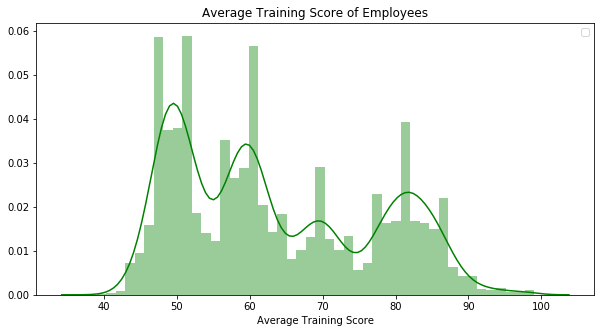

In [23]:
#Average Training Score
plt.figure(figsize=(10,5))
sns.distplot(train.avg_training_score,color='green')
plt.xlabel("Average Training Score")
plt.title("Average Training Score of Employees")
plt.legend()
plt.show()

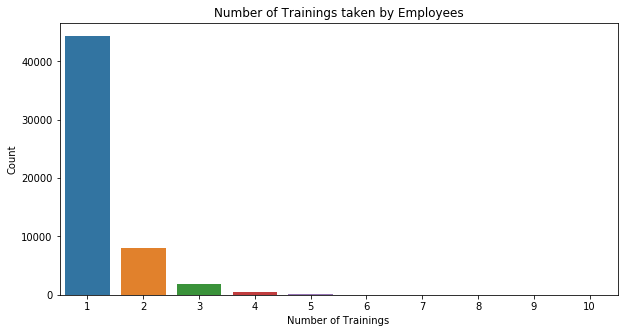

In [24]:
plt.figure(figsize=(10,5))
sns.countplot('no_of_trainings',data=train)
plt.xlabel("Number of Trainings")
plt.ylabel("Count")
plt.title("Number of Trainings taken by Employees")
plt.show()

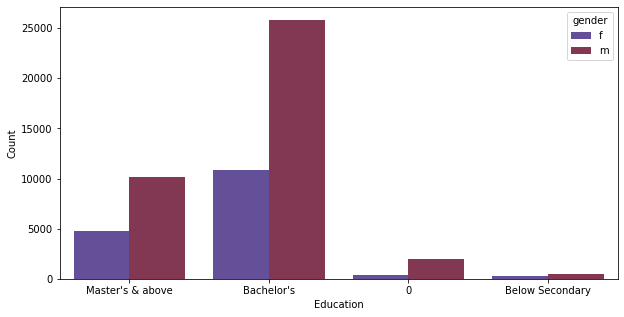

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'education', hue='gender',data=train,palette='twilight')
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

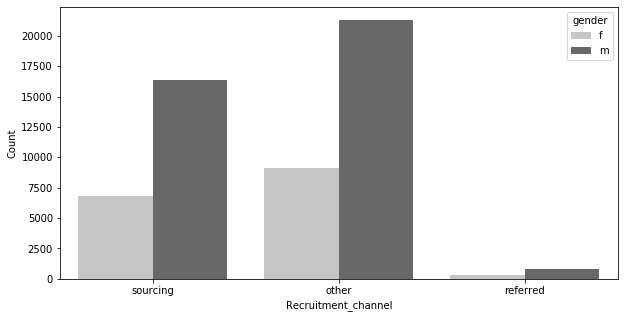

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'recruitment_channel', hue='gender',data=train,palette='Greys')
plt.xlabel("Recruitment_channel")
plt.ylabel("Count")
plt.show()


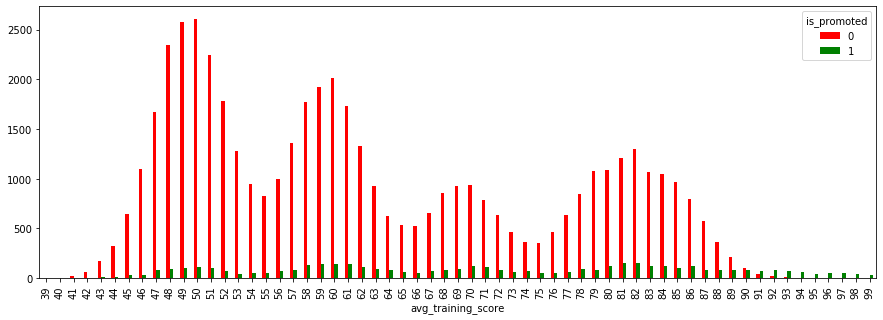

In [27]:
pd.crosstab(train.avg_training_score,train.is_promoted).plot(kind='bar',figsize=(15,5),color=('red','green'))

In [30]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

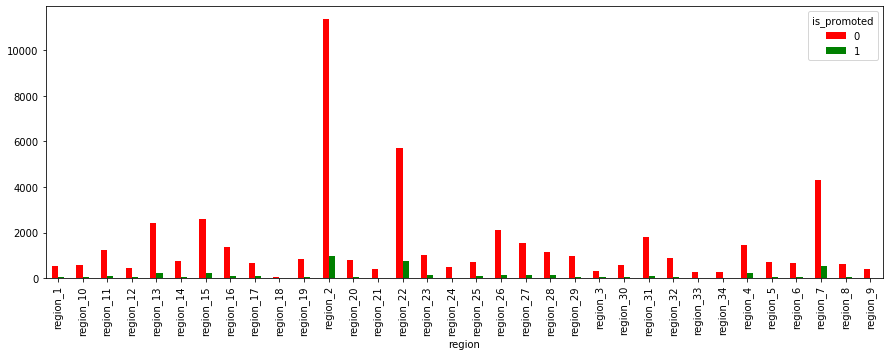

In [31]:
pd.crosstab(train.region,train.is_promoted).plot(kind='bar',figsize=(15,5),color=('red','green'))

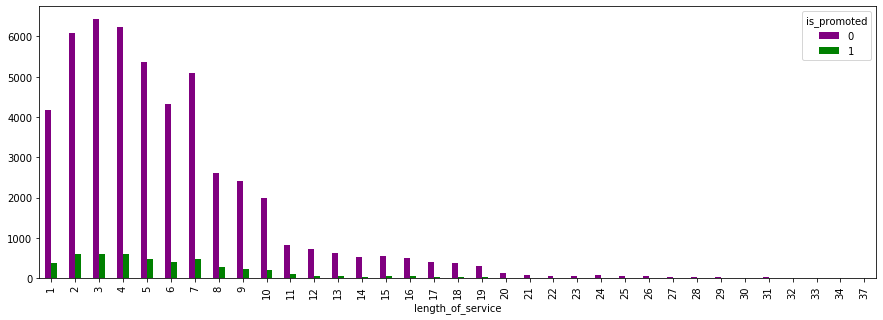

In [32]:
pd.crosstab(train.length_of_service,train.is_promoted).plot(kind='bar',figsize=(15,5),color=('purple','green'))

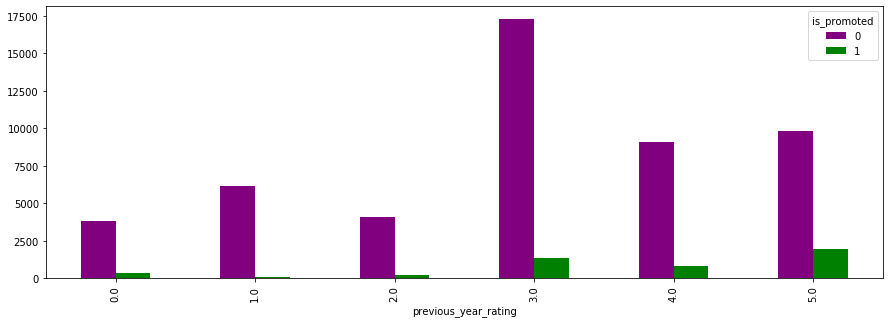

In [33]:
pd.crosstab(train.previous_year_rating,train.is_promoted).plot(kind='bar',figsize=(15,5),color=('purple','green'))

In [34]:
#Divide Numerical and categorical variables
numeric_var_names = [key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float32','float64','int32','int64']]
cat_var_names = [key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object','O']]

In [35]:
hr_num = train[numeric_var_names]
hr_cat = train[cat_var_names]

In [36]:
#create Data Audit Report
def var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.var(),x.std(),x.mean(),x.median(),x.min(),x.dropna().quantile(0.01),x.dropna().quantile(0.05),
              x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),x.dropna().quantile(0.90),
              x.dropna().quantile(0.95),x.dropna().quantile(0.99)],index=['N','NMISS','SUM','VAR','STD','MEAN','MEDIAN','MIN','P1','P5','P10','P25','P50','P75','P90','P95','P99'])
num_summary = hr_num.apply(lambda x : var_summary(x)).T
num_summary

#As we can see that there are no outliers.

,N,NMISS,SUM,VAR,STD,MEAN,MEDIAN,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99
employee_id,54808.0,0.0,2.148245e+09,5.101537e+08,22586.581449,39195.830627,39225.5,1.0,795.07,3916.35,7849.7,19669.75,39225.5,58730.5,70459.3,74415.3,77509.93
no_of_trainings,54808.0,0.0,6.867500e+04,3.712026e-01,0.609264,1.253011,1.0,1.0,1.00,1.00,1.0,1.00,1.0,1.0,2.0,2.0,4.00
age,54808.0,0.0,1.907533e+06,5.867819e+01,7.660169,34.803915,33.0,20.0,23.00,25.00,27.0,29.00,33.0,39.0,46.0,51.0,58.00
previous_year_rating,54808.0,0.0,1.687400e+05,2.239388e+00,1.496458,3.078748,3.0,0.0,0.00,0.00,1.0,2.00,3.0,4.0,5.0,5.0,5.00
length_of_service,54808.0,0.0,3.214770e+05,1.819103e+01,4.265094,5.865512,5.0,1.0,1.00,1.00,2.0,3.00,5.0,7.0,11.0,15.0,20.00
KPIs_met >80%,54808.0,0.0,1.929100e+04,2.280925e-01,0.477590,0.351974,0.0,0.0,0.00,0.00,0.0,0.00,0.0,1.0,1.0,1.0,1.00
awards_won?,54808.0,0.0,1.270000e+03,2.263528e-02,0.150450,0.023172,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,1.00
avg_training_score,54808.0,0.0,3.474101e+06,1.787986e+02,13.371559,63.386750,60.0,39.0,44.00,47.00,48.0,51.00,60.0,76.0,83.0,86.0,91.00
is_promoted,54808.0,0.0,4.668000e+03,7.791753e-02,0.279137,0.085170,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,1.0,1.00


In [37]:
hr_num['previous_year_rating'].fillna(3,inplace=True)
hr_num['previous_year_rating'].isnull().sum()
test['previous_year_rating'].fillna(3,inplace=True)
test['previous_year_rating'].isnull().sum()


C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\pandas\core\series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


0

In [38]:
def cat_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.value_counts()],index=['N','NMISS','COUNT'])

cat_summary = hr_cat.apply(lambda x : cat_summary(x)).T
cat_summary

,N,NMISS,COUNT
department,54808,0,Sales & Marketing 16840 Operations ...
region,54808,0,region_2 12343 region_22 6428 region_7...
education,54808,0,Bachelor's 36669 Master's & above ...
gender,54808,0,"m 38496 f 16312 Name: gender, dtype: int64"
recruitment_channel,54808,0,other 30446 sourcing 23220 referred ...


In [39]:
#Missing value Treatment of categorical variables

hr_cat.education.fillna(hr_cat.education.mode()[0],inplace=True)
hr_cat.education.isnull().sum()
test.education.fillna(test.education.mode()[0],inplace=True)
test.education.isnull().sum()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\pandas\core\series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


0

ModuleNotFoundError: No module named 'catboost'